In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pandas_profiling
warnings.filterwarnings('ignore')

import pickle

## Problem Statement
All the patients suffered heart attacks at some point in the past. Some are still alive and some are not. The survival and still-alive variables, when taken together, indicate whether a patient survived for at least one year following the heart attack.

The problem addressed by past researchers was to predict from the other variables whether or not the patient will survive at least one year. The most difficult part of this problem is correctly predicting that the patient will NOT survive. (Part of the difficulty seems to be the size of the data set.)

In [2]:
df = pd.read_csv("Echocardiogram.data", error_bad_lines=False,header=None,sep=",")
df.head()

b'Skipping line 50: expected 13 fields, saw 14\n'


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [3]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [4]:
df=df.rename(columns={0: "Survival(in months)", 1: "Still Alive",2: "Age at heart attack",3: "pericardial-effusion",4: " fractional-shortening",5: "epss",6: "lvdd",7: "wall-motion-score",8: "wall-motion-index",9: "mult",10: "name",11: "group",12: "alive-at-1"})

In [5]:
df.head(5)

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-score,wall-motion-index,mult,name,group,alive-at-1
0,11,0,71,0,0.260,9,4.600,14,1,1,name,1,0
1,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
2,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
3,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
4,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0


In [6]:
df.shape

(131, 13)

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Survival(in months)     131 non-null    object
 1   Still Alive             131 non-null    int64 
 2   Age at heart attack     131 non-null    object
 3   pericardial-effusion    131 non-null    int64 
 4    fractional-shortening  131 non-null    object
 5   epss                    131 non-null    object
 6   lvdd                    131 non-null    object
 7   wall-motion-score       131 non-null    object
 8   wall-motion-index       131 non-null    object
 9   mult                    131 non-null    object
 10  name                    131 non-null    object
 11  group                   131 non-null    object
 12  alive-at-1              131 non-null    object
dtypes: int64(2), object(11)
memory usage: 13.4+ KB


In [7]:
# As mentioned we do not need these three columns
df=df.drop(["name","group","wall-motion-score"], axis=1)
df.shape

(131, 10)

In [8]:
df.columns

Index(['Survival(in months)', 'Still Alive', 'Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index', 'mult', 'alive-at-1'],
      dtype='object')

In [9]:
for i in df.columns.tolist():
    df[i]=pd.to_numeric(df[i], errors='coerce')

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Survival(in months)     130 non-null    float64
 1   Still Alive             131 non-null    int64  
 2   Age at heart attack     126 non-null    float64
 3   pericardial-effusion    131 non-null    int64  
 4    fractional-shortening  124 non-null    float64
 5   epss                    117 non-null    float64
 6   lvdd                    121 non-null    float64
 7   wall-motion-index       130 non-null    float64
 8   mult                    128 non-null    float64
 9   alive-at-1              74 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 10.4 KB


In [10]:
df.drop(df[df["Survival(in months)"]<12].index, inplace = True)  #Point number 2 of the problem statement

In [11]:
df.shape

(93, 10)

In [432]:
df.head()

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,mult,alive-at-1
1,19.0,0,72.0,0,0.380,6.000,4.100,1.70,0.588,0.0
2,16.0,0,55.0,0,0.260,4.000,3.420,1.00,1.000,0.0
3,57.0,0,60.0,0,0.253,12.062,4.603,1.45,0.788,0.0
4,19.0,1,57.0,0,0.160,22.000,5.750,2.25,0.571,0.0
5,26.0,0,68.0,0,0.260,5.000,4.310,1.00,0.857,0.0


In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Survival(in months),92.0,30.211957,11.351583,12.000,22.00,29.0000,36.250,57.00
Still Alive,93.0,0.096774,0.297252,0.000,0.00,0.0000,0.000,1.00
Age at heart attack,90.0,61.300000,7.944258,35.000,57.00,61.0000,65.000,81.00
pericardial-effusion,93.0,0.150538,0.359536,0.000,0.00,0.0000,0.000,1.00
fractional-shortening,90.0,0.230056,0.110800,0.030,0.15,0.2185,0.290,0.61
epss,85.0,10.973471,7.018651,0.000,6.00,9.4000,13.200,31.00
lvdd,89.0,4.633393,0.793993,2.320,4.16,4.5100,5.200,6.74
wall-motion-index,93.0,1.274247,0.349541,1.000,1.00,1.1400,1.409,2.39
mult,92.0,0.784793,0.196385,0.357,0.71,0.7860,0.857,2.00
alive-at-1,49.0,0.020408,0.142857,0.000,0.00,0.0000,0.000,1.00


## Feature Engineering

### Checking for null values

In [361]:
df.isnull().sum()

Survival(in months)        1
Still Alive                0
Age at heart attack        3
pericardial-effusion       0
 fractional-shortening     3
epss                       8
lvdd                       4
wall-motion-index          0
mult                       1
alive-at-1                44
dtype: int64

#### 44/93=47.3%  records do not have any value for their  output feature 

##### We shall use the first two columns to predict the O/P here

In [13]:
df[df["alive-at-1"].isnull()].head()

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,mult,alive-at-1
24,48.0,0,64.0,0,0.19,5.90,3.48,1.110,0.640,NaN
25,29.0,0,54.0,0,0.30,7.00,3.85,1.667,0.430,NaN
26,29.0,0,35.0,0,0.30,5.00,4.17,1.000,1.000,NaN
27,29.0,0,55.0,0,NaN,7.00,NaN,1.000,2.000,NaN
33,27.0,0,47.0,0,0.40,5.12,3.10,1.000,0.857,NaN


In [14]:
indices=df[(df["Survival(in months)"]>=12) & (df["Still Alive"]==1)].index

In [15]:
for i in indices.tolist():
    df['alive-at-1'][i]=1

In [16]:
indices=df[(df["Survival(in months)"]>=12) & (df["Still Alive"]==0)].index

In [17]:
for i in indices.tolist():
    df['alive-at-1'][i]=0

### Checking whether the target class is balanced or not

In [18]:
df["alive-at-1"].value_counts()

0.0    84
1.0     9
Name: alive-at-1, dtype: int64

[Text(0, 0, 'Dead or no followup'), Text(0, 0, 'Alive')]

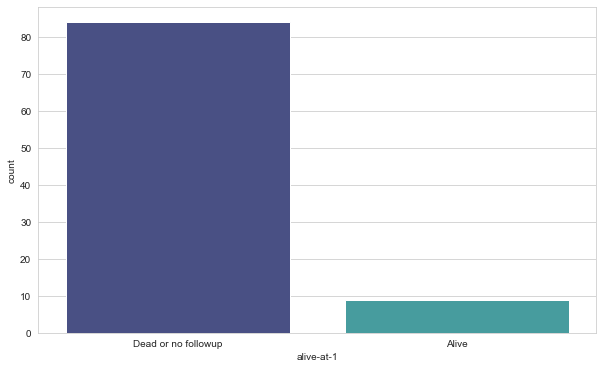

In [19]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="alive-at-1",data=df,palette="mako")
plot.set_xticklabels(["Dead or no followup","Alive"])

#### Seems to be very unblanced going ahead with Over Sampling Technique

### Over Sampling

In [21]:
X=df[['Survival(in months)',
 'Still Alive',
 'Age at heart attack',
 'pericardial-effusion',
 ' fractional-shortening',
 'epss',
 'lvdd',
 'wall-motion-index',
 'mult']]
Y=df['alive-at-1']

In [22]:
print(X.shape)
print(Y.shape)

(93, 9)
(93,)


In [23]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [24]:
os =RandomOverSampler(sampling_strategy=0.6)
# Ratio factor of 1 means since 0 has 50 and 1 has 24 , it find the class with majority count and since the ratio factor is 0.6 it means it will find the total 60%  of the majority class (here 64) and will decide the amount of points to be added to other class to make it totally balance from 9 to 50

In [25]:
X_train_res, y_train_res = os.fit_resample(X, Y)

In [26]:
X_train_res.shape,y_train_res.shape  # Original 93 points of dataset + new 41 points

((134, 9), (134,))

In [27]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0.0: 84, 1.0: 9})
Resampled dataset shape Counter({0.0: 84, 1.0: 50})


In [28]:
df=X_train_res
df['alive-at-1']=y_train_res

In [29]:
df.head()

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,mult,alive-at-1
0,19.0,0,72.0,0,0.380,6.000,4.100,1.70,0.588,0.0
1,16.0,0,55.0,0,0.260,4.000,3.420,1.00,1.000,0.0
2,57.0,0,60.0,0,0.253,12.062,4.603,1.45,0.788,0.0
3,19.0,1,57.0,0,0.160,22.000,5.750,2.25,0.571,1.0
4,26.0,0,68.0,0,0.260,5.000,4.310,1.00,0.857,0.0


[Text(0, 0, 'Dead or no followup'), Text(0, 0, 'Alive')]

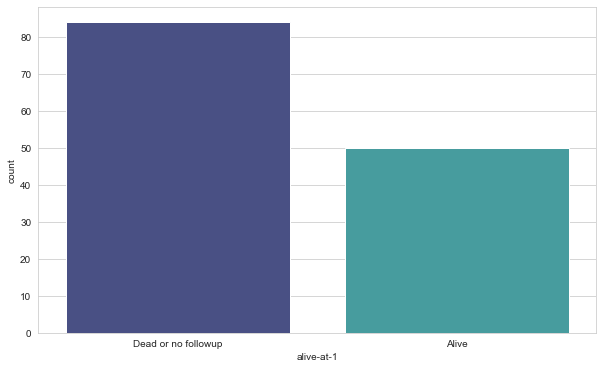

In [30]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
plot=sns.countplot(x="alive-at-1",data=df,palette="mako")
plot.set_xticklabels(["Dead or no followup","Alive"])

## Performing EDA using Panda Profiling

In [31]:
prof_report = pandas_profiling.ProfileReport(df , title = 'Echocardiogram Results')
prof_report.to_widgets()

In [228]:
df.columns

Index(['Survival(in months)', 'Still Alive', 'Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index', 'mult', 'alive-at-1'],
      dtype='object')

## Checking for outliers

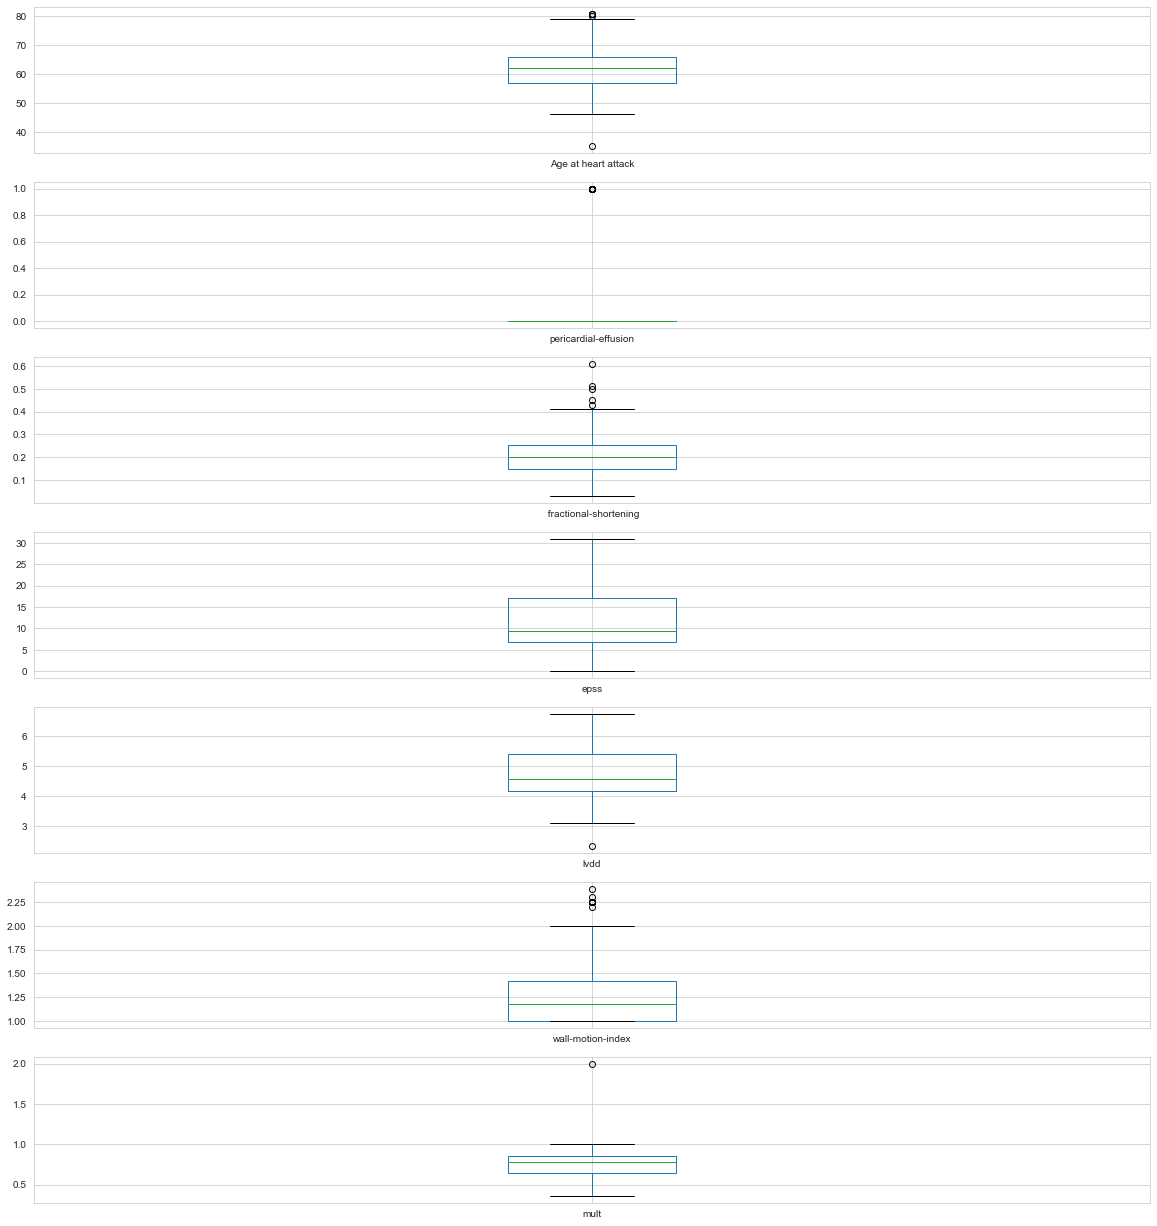

In [379]:
fig, axes = plt.subplots(7,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='Age at heart attack')
df.boxplot(ax=axes[1],column='pericardial-effusion')
df.boxplot(ax=axes[2],column=' fractional-shortening')
df.boxplot(ax=axes[3],column='epss')
df.boxplot(ax=axes[4],column='lvdd')
df.boxplot(ax=axes[5],column='wall-motion-index')
df.boxplot(ax=axes[6],column='mult')

In [380]:
IQR=df[' fractional-shortening'].quantile(0.75)-df[' fractional-shortening'].quantile(0.25)
upper_bridge=df[' fractional-shortening'].quantile(0.75)+(IQR*1.5)
indices=df[df[' fractional-shortening']>upper_bridge].index
for i in indices.tolist():
    df[' fractional-shortening'][i]=upper_bridge

In [381]:
IQR=df['wall-motion-index'].quantile(0.75)-df['wall-motion-index'].quantile(0.25)
upper_bridge=df['wall-motion-index'].quantile(0.75)+(IQR*1.5)
indices=df[df['wall-motion-index']>upper_bridge].index
for i in indices.tolist():
    df['wall-motion-index'][i]=upper_bridge

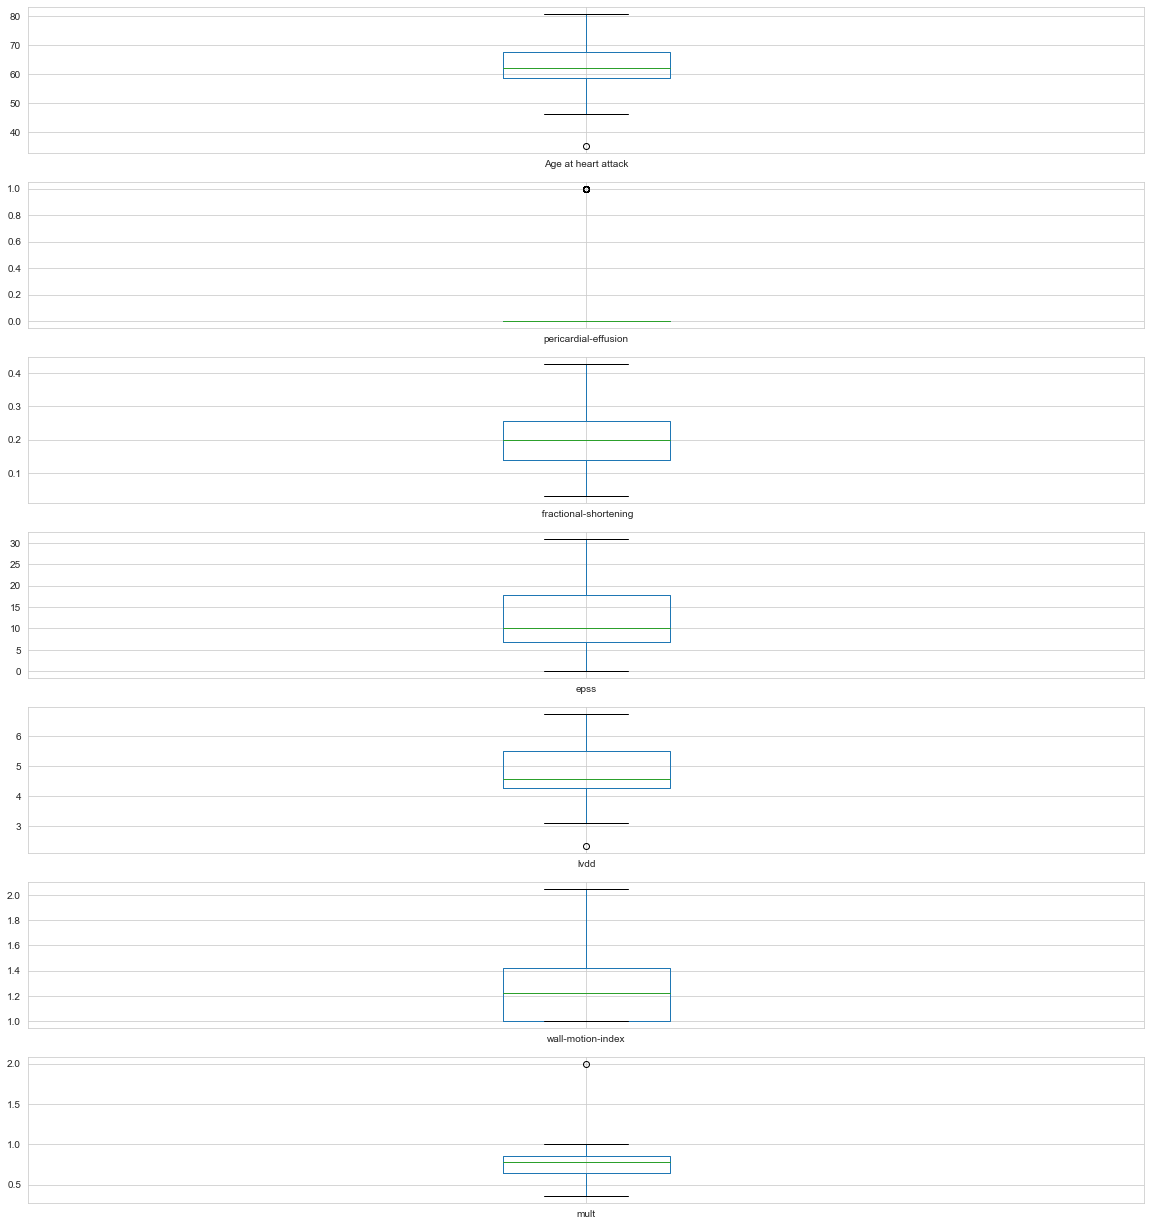

In [324]:
fig, axes = plt.subplots(7,1, sharex=False, figsize=(20,22))
df.boxplot(ax=axes[0],column='Age at heart attack')
df.boxplot(ax=axes[1],column='pericardial-effusion')
df.boxplot(ax=axes[2],column=' fractional-shortening')
df.boxplot(ax=axes[3],column='epss')
df.boxplot(ax=axes[4],column='lvdd')
df.boxplot(ax=axes[5],column='wall-motion-index')
df.boxplot(ax=axes[6],column='mult')

## Feature Selection

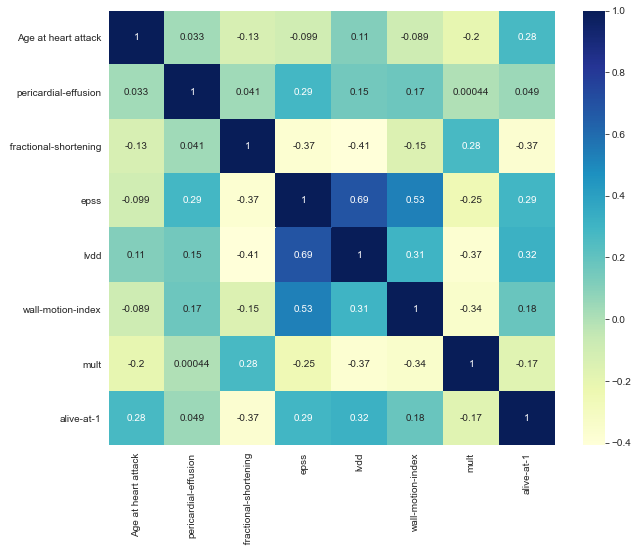

In [382]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index', 'mult', 'alive-at-1']].corr(),annot=True,cmap="YlGnBu")

#### using Karl Pearson Correlation and Spearman's Rank correlation (From Panda's Profiling) we see that 
#### Age, fractional-shortening, epss, lvdd,wall-motion-index are the continuous features that affect the O/P

#### Using Filter method ( X-Square technique) - For the  categorical attribute

In [383]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df[['pericardial-effusion']]  #independent column
y = df['alive-at-1']    #target column

In [384]:
#apply SelectKBest class to extract the best features
bestfeatures = SelectKBest(score_func=chi2, k=1)
fit = bestfeatures.fit(X,y)

In [385]:
dfscores = pd.DataFrame(fit.scores_)
dfpvalues=pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(X.columns)

In [386]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Specs','Score',"P-Values"]  #naming the dataframe columns

In [387]:
featureScores

,Specs,Score,P-Values
0,pericardial-effusion,0.275918,0.599389


#### Since p-vaue > 0.05 we fail to Reject H0 at 95% significance level, Hence pericardial-effusion is associated with the O/P

In [388]:
df.columns

Index(['Survival(in months)', 'Still Alive', 'Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index', 'mult', 'alive-at-1'],
      dtype='object')

In [389]:
x = df[['Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index']]

In [390]:
y=df['alive-at-1']

In [391]:
df.head()

,Survival(in months),Still Alive,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index,mult,alive-at-1
0,19.0,0,72.0,0,0.380,6.000,4.100,1.70,0.588,0.0
1,16.0,0,55.0,0,0.260,4.000,3.420,1.00,1.000,0.0
2,57.0,0,60.0,0,0.253,12.062,4.603,1.45,0.788,0.0
3,19.0,1,57.0,0,0.160,22.000,5.750,2.05,0.571,1.0
4,26.0,0,68.0,0,0.260,5.000,4.310,1.00,0.857,0.0


## Creating the model

In [440]:
from sklearn.model_selection import train_test_split

In [441]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)

## Filling in the missing values, doing this after split so as to avoid Data Leak

In [442]:
mean_age=x_train["Age at heart attack"].mean()

x_train["Age at heart attack"]=x_train["Age at heart attack"].fillna(value=mean_age)
x_test["Age at heart attack"]=x_test["Age at heart attack"].fillna(value=mean_age)

In [443]:
mean_fracshorten=x_train[' fractional-shortening'].mean()

x_train[' fractional-shortening']=x_train[' fractional-shortening'].fillna(value=mean_fracshorten)
x_test[' fractional-shortening']=x_test[' fractional-shortening'].fillna(value=mean_fracshorten)

In [444]:
mean_epss=x_train['epss'].mean()

x_train['epss']=x_train['epss'].fillna(value=mean_epss)
x_test['epss']=x_test['epss'].fillna(value=mean_epss)

In [445]:
mean_lvdd=x_train['lvdd'].mean()

x_train['lvdd']=x_train['lvdd'].fillna(value=mean_lvdd)
x_test['lvdd']=x_test['lvdd'].fillna(value=mean_lvdd)

In [446]:
x_train.isnull().sum()

Age at heart attack       0
pericardial-effusion      0
 fractional-shortening    0
epss                      0
lvdd                      0
wall-motion-index         0
dtype: int64

### K Neighbors Classifier

In [399]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

In [447]:
standardScaler = StandardScaler()
columns_to_scale = ['Age at heart attack','epss', 'lvdd','wall-motion-index']
x_train[columns_to_scale] = standardScaler.fit_transform(x_train[columns_to_scale])
x_train.head()
x_test[columns_to_scale] = standardScaler.transform(x_test[columns_to_scale])

#### Filling the missing values for the required features in the original dataset just for cross validation and not for any predictive purpose

In [343]:

mean_age=df["Age at heart attack"].mean()
df["Age at heart attack"]=df["Age at heart attack"].fillna(value=mean_age)

mean_fracshorten=df[' fractional-shortening'].mean()
df[' fractional-shortening']=df[' fractional-shortening'].fillna(value=mean_fracshorten)

mean_epss=df['epss'].mean()
df['epss']=df['epss'].fillna(value=mean_epss)

mean_lvdd=df['lvdd'].mean()
df['lvdd']=df['lvdd'].fillna(value=mean_lvdd)


In [158]:
df.isnull().sum()

Survival(in months)       3
Still Alive               0
Age at heart attack       0
pericardial-effusion      0
 fractional-shortening    0
epss                      0
lvdd                      0
wall-motion-index         0
mult                      1
alive-at-1                0
dtype: int64

In [159]:
x = df[['Age at heart attack',
       'pericardial-effusion', ' fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index']]
y=df['alive-at-1']

In [160]:
knn_scores = []
for k in range(1,20):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,x,y,cv=10)
    knn_scores.append(score.mean())

In [161]:
knn_scores

[0.9478021978021978,
 0.9478021978021978,
 0.8587912087912087,
 0.8291208791208792,
 0.8060439560439561,
 0.798901098901099,
 0.7917582417582417,
 0.7620879120879122,
 0.7763736263736264,
 0.8214285714285714,
 0.8214285714285714,
 0.7912087912087913,
 0.8291208791208791,
 0.7912087912087913,
 0.7835164835164835,
 0.7912087912087913,
 0.7763736263736264,
 0.7906593406593407,
 0.7829670329670331]

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

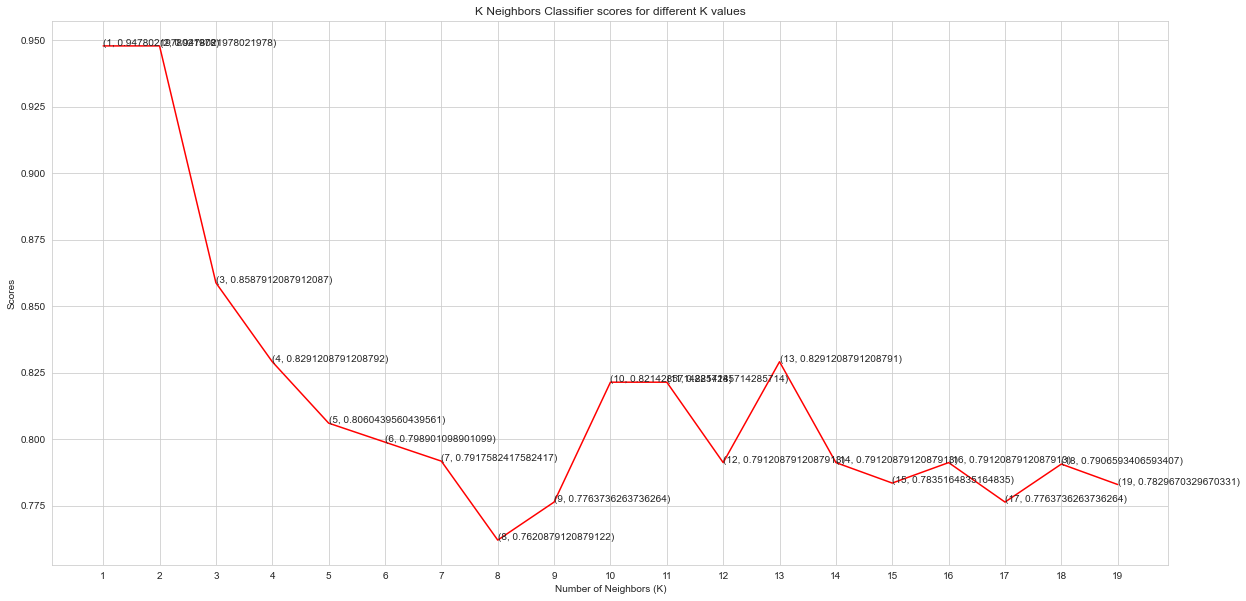

In [162]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1, 20)], knn_scores, color = 'red')
for i in range(1,20):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

## Creating the model

In [163]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [164]:
error_rate

[0.11764705882352941,
 0.11764705882352941,
 0.17647058823529413,
 0.17647058823529413,
 0.17647058823529413,
 0.23529411764705882,
 0.2647058823529412,
 0.23529411764705882,
 0.23529411764705882,
 0.20588235294117646,
 0.20588235294117646,
 0.20588235294117646,
 0.20588235294117646,
 0.20588235294117646,
 0.20588235294117646,
 0.29411764705882354,
 0.29411764705882354,
 0.29411764705882354,
 0.29411764705882354]

Text(0.5, 1.0, 'Error rate for different K values')

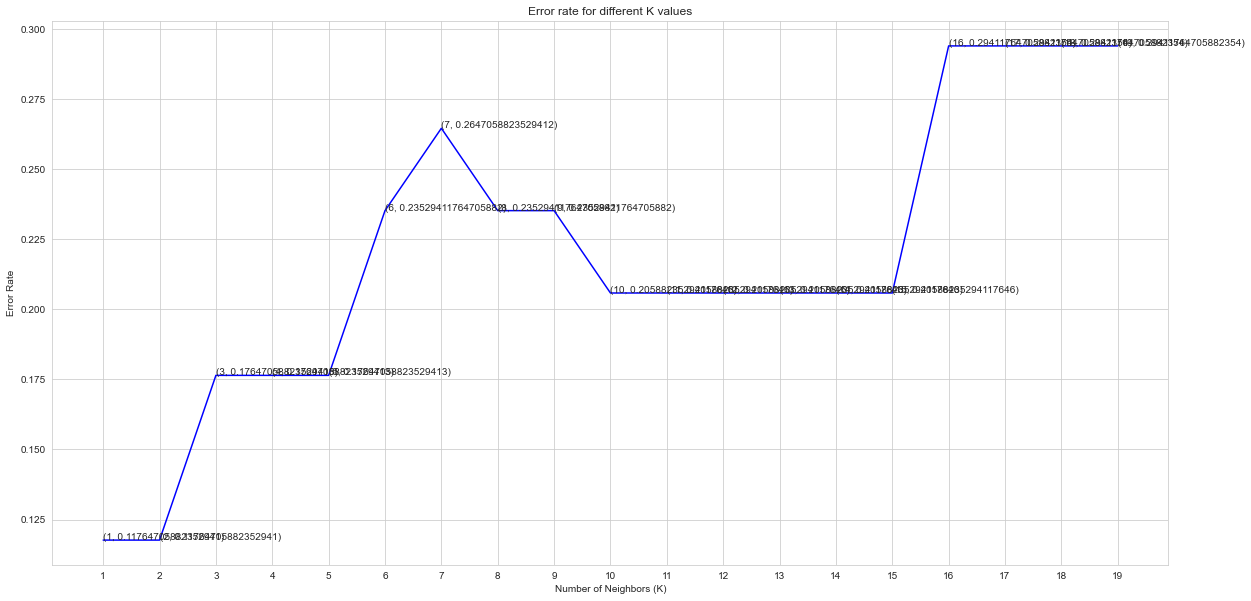

In [165]:
plt.figure(figsize=(20,10))
plt.plot([k for k in range(1, 20)],error_rate, color = 'blue')
for i in range(1,20):
    plt.text(i, error_rate[i-1], (i, error_rate[i-1]))
plt.xticks([i for i in range(1, 20)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Error rate for different K values')

#### k=2 could be an ideal choice as it gives less error rate and more accuracy

In [401]:
knnclassifier = KNeighborsClassifier(n_neighbors=2)
weights=knnclassifier.fit(x_train,y_train)
predictions = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,predictions)

0.9411764705882353

In [402]:
print(confusion_matrix(y_test,predictions))

[[19  0]
 [ 2 13]]


In [417]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        19
         1.0       1.00      0.87      0.93        15

    accuracy                           0.94        34
   macro avg       0.95      0.93      0.94        34
weighted avg       0.95      0.94      0.94        34



In [1]:
#Use weights attribute for scaling in case of new data

In [419]:
# Saving model to disk
pickle.dump(knnclassifier, open('echocardiogramResults.pkl','wb'))

#Saving the scaler to disk
pickle.dump(standardScaler, open('echocardiogramScaler.pkl', 'wb'))

In [436]:
x_test.shape

(34, 6)

In [449]:
x_test.iloc[25:30]

,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index
13,0.425558,0,0.09,0.606998,1.345922,0.016575
25,-1.148204,0,0.35,-0.418135,-1.451116,-0.291606
50,0.032118,0,0.20,-0.990612,0.554982,-0.907968
31,-0.492470,0,0.03,1.179475,1.947751,-0.047282
67,0.950146,0,0.38,-1.656283,-0.275568,-0.907968


In [437]:
x_test.iloc[25:30]

,Age at heart attack,pericardial-effusion,fractional-shortening,epss,lvdd,wall-motion-index
13,66.0,0,0.09,17.0,5.819,1.333
25,54.0,0,0.35,9.3,3.630,1.222
50,63.0,0,0.20,5.0,5.200,1.000
31,59.0,0,0.03,21.3,6.290,1.310
67,70.0,0,0.38,0.0,4.550,1.000


In [438]:
y_test.iloc[25:30]

13    1.0
25    0.0
50    0.0
31    1.0
67    0.0
Name: alive-at-1, dtype: float64